In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from finquant.efficient_frontier import EfficientFrontier
%matplotlib inline

We're going to suppress the scientific notation like "3.622707e-17" to increase the readability with the below code.

'set_option' sets the value of the specified option. 'display.float_format' is one of options that you can change. We made a lambda function to display numbers only upto 5 digits after dicimal point by using '%.5f'. 

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Read the csv file that we created from the L12 that contains the return data of 7 ETFs.

In [3]:
returns = pd.read_csv("hist_return.csv", index_col="Date", parse_dates=True).dropna()
returns

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
Date,,,,,,,
2017-03-28,0.00736,0.00000,-0.00159,0.00166,-0.00068,0.00760,0.00797
2017-03-29,0.00148,0.00569,0.00377,0.00249,0.00348,0.00359,0.00264
2017-03-30,0.00253,0.00000,-0.00178,-0.00538,-0.00058,0.00487,0.00847
2017-03-31,-0.00193,-0.00234,0.00119,-0.00665,-0.00039,0.00035,0.00188
2017-04-03,-0.00169,-0.00618,0.00248,0.00649,0.00286,-0.00520,-0.01836
...,...,...,...,...,...,...,...
2019-12-24,0.00012,-0.00362,0.00077,-0.00168,0.00100,-0.00010,0.00274
2019-12-26,0.00518,0.00710,0.00077,0.00787,-0.00073,0.00219,-0.00131
2019-12-27,-0.00019,0.00120,0.00154,0.00428,0.00091,-0.00165,-0.00452


Get `EfficientFrontier` with `mean_returns` and  `covariance` of the above data.

In [4]:
mean_returns =  returns.mean()
covariance = returns.cov()
ef = EfficientFrontier(mean_returns, covariance)

The `maximum_sharpe_ratio()` method finds the portfolio with the maximum sharpe ratio, also called the tangency portfolio.

In [5]:
msp = ef.maximum_sharpe_ratio()
msp

,Allocation
IVV,0.12527
IDEV,0.00000
IUSB,0.56422
IEMG,0.00000
IAGG,0.31051
IJH,0.00000
IJR,0.00000


The `minimum_volatility()` method will find the portfolio with the minimum volatility.

In [6]:
mvp = ef.minimum_volatility()
mvp

,Allocation
IVV,0.00943
IDEV,0.00961
IUSB,0.68575
IEMG,0.00000
IAGG,0.24752
IJH,0.00645
IJR,0.04123


Now, We're going to draw a bar plot with `msp`. Seaborn library has a `barplot()` method to draw a bar plot. You can also draw a bar plot with pandas or matplotlib but you have to customize every little detail with them. But seaborn provides a high-level interface for drawing attractive graphics with ease.

Text(0, 0.5, 'Weights in Portfolio (As a decimal)')

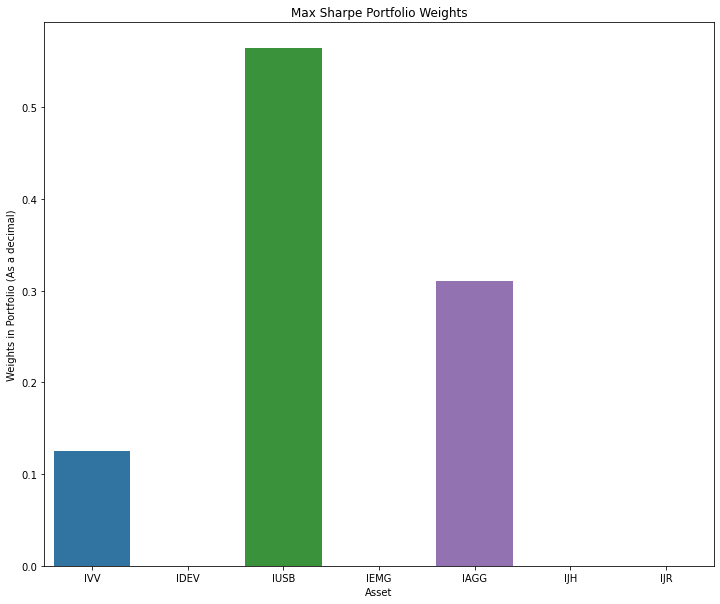

In [7]:
fig = plt.figure(figsize=(12, 10))
ax = sns.barplot(x=msp.index, y="Allocation", data=msp)
ax.set_title('Max Sharpe Portfolio Weights')
ax.set_xlabel('Asset')
ax.set_ylabel('Weights in Portfolio (As a decimal)')

By giving target volatility as an argument to efficient_volatility(), we can find the maximum return we can get out of the target risk.

In [8]:
mrp = ef.efficient_volatility(0.02)
mrp

,Allocation
IVV,0.00668
IDEV,0.00793
IUSB,0.68806
IEMG,0.00000
IAGG,0.24563
IJH,0.01699
IJR,0.03471


Draw a bar graph with the above portfolio's weights. 

Text(0, 0.5, 'Weights in Portfolio (%)')

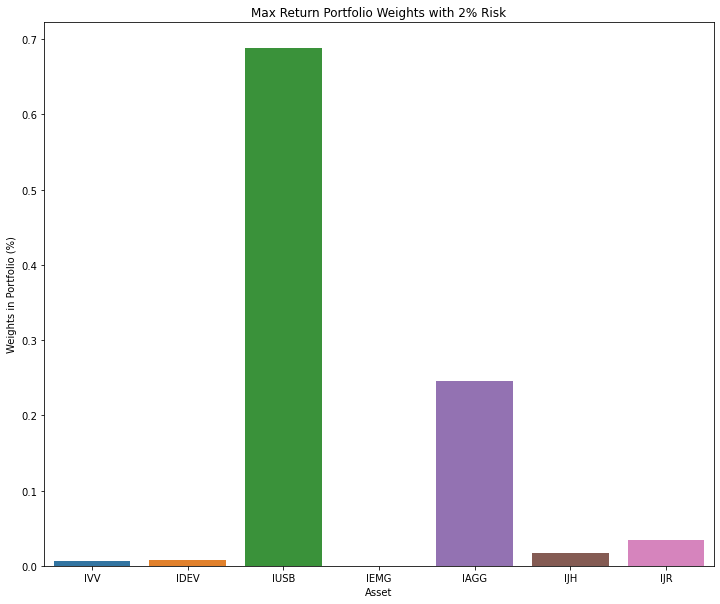

In [9]:
fig = plt.figure(figsize = (12, 10))
ax = sns.barplot(x=mrp.index, y='Allocation', data=mrp)
ax.set_title('Max Return Portfolio Weights with 2% Risk')
ax.set_xlabel('Asset')
ax.set_ylabel('Weights in Portfolio (%)')

We can join columns with other DataFrame on the index with `join()` method. `add_prefix()` will add a prefix to the column names. By doing this, we can have different column names for the same name columns. 'join' will combine two tables using the index. 

In [10]:
msp_mrp_weights = msp.add_prefix('MSP_').join(mrp.add_prefix('MRP_'))
msp_mrp_weights

,MSP_Allocation,MRP_Allocation
IVV,0.12527,0.00668
IDEV,0.00000,0.00793
IUSB,0.56422,0.68806
IEMG,0.00000,0.00000
IAGG,0.31051,0.24563
IJH,0.00000,0.01699
IJR,0.00000,0.03471


Save the above table as csv.

In [11]:
msp_mrp_weights.to_csv('msp_mrp_weights.csv')